In [21]:
##########################################
#           DATA BLOCKS                  #
##########################################

In [1]:
# LIBS ------ 
from fastai.vision.all import CategoryBlock
from fastai.vision.data import ImageBlock
from fastai.vision.data import DataBlock
from fastai.vision.all import get_image_files 
from fastai.data.transforms import RandomSplitter
from fastai.data.transforms import parent_label
from fastai.vision.augment import *
from fastai.vision.all import cnn_learner,resnet18, error_rate, accuracy 
from fastai.interpret import ClassificationInterpretation # Confusion mat
from PIL import Image
import os
# WD ------
wd= "/home/camilo/Documents/Own Projects/MISC/CV_balls/"
os.chdir(wd)
# HYPERPARAMS ------
path_input_data= "/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/"

In [35]:
# CORRECT TRANSPARENCY ------ 
# Convert images to RGB channels 
# prevents problems for images that have alpha channels

photos=get_image_files(path_input_data)
for i in photos:
    print(i)
    img = Image.open(i)
    img_rgb= img.convert('RGB')
    img_rgb.save(i)

/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_89.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_88.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_83.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_54.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_136.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_96.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_38.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_145.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_92.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_144.j

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_57.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_103.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_3.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_24.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_42.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_43.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_39.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_102.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_4.jpg
/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/basketball ball/basketball ball_109.jpg

In [36]:
# CREATE DATABLOCK ------
balls_loader_baseline = DataBlock(
blocks=(ImageBlock, CategoryBlock),# independent => image ; dependent => label 
get_items= get_image_files, # list directory 
splitter= RandomSplitter(valid_pct=0.2,seed=1), # separate val
get_y= parent_label, # auto label with folder name 
item_tfms=Resize(128*2)
) # resize to 640 

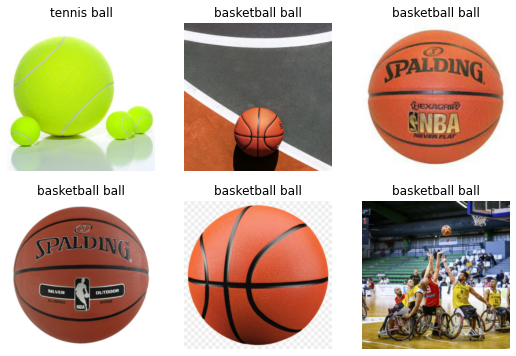

In [40]:
# DATALOADER ------
balls_dataset_baseline=balls_loader_baseline.dataloaders(source="/home/camilo/Documents/Own Projects/MISC/CV_balls/data_input/")
# display example
balls_dataset_baseline.valid.show_batch(max_n=6, nrows=2)

In [41]:
# MODEL 
# Transfer learning from resnet
base_model = cnn_learner(balls_dataset_baseline, resnet18, metrics=accuracy)
base_model.fine_tune(epochs=4)

epoch,train_loss,valid_loss,accuracy,time
0,1.384325,0.708917,0.714286,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.206195,0.197703,0.938776,00:16
1,0.140739,0.232971,0.938776,00:15
2,0.095850,0.245757,0.959184,00:15
3,0.077215,0.236322,0.959184,00:15


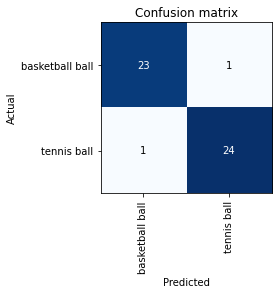

In [64]:
# Confusion matrix ---
interp = ClassificationInterpretation.from_learner(base_model)
interp.plot_confusion_matrix()

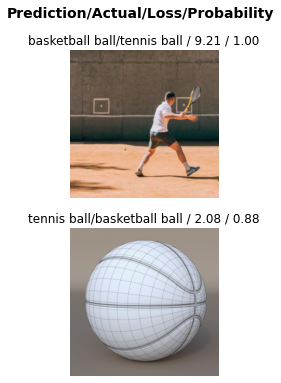

In [66]:
# top losses ------
interp.plot_top_losses(2, nrows=2)